# Harry Potter Network Analysis

The aim of this project is to answer the following quetions:
    <p> 1. What are the most important characters?</p>
    <p> 2. How did their importance evolve overtime?</p>
    <p> 3. What are the main communities in this network?</p>
    

In [1]:
# Installing the relevant packages

import pandas as pd
import numpy as np
import spacy # for natural language processing
from spacy import displacy #for the visualization of entities
import networkx as nx #for analysing the network

import matplotlib.pyplot as plt # for some plot settings

I installed and loaded the english module for spacy by using the following command in terminal:
<p> pip install spacy </p>
<p> python -m spacy download en </p>

In [2]:
# Load the Spacy English Language model
NER = spacy.load("en_core_web_sm")  # NER stands for Name Entity Recogniiton
NER.max_length = 1500000  # Increase the max_length limit to 1.5 million characters

## Load Books

In [4]:
import os

# Get all book files in the text directory
all_books = [b for b in os.scandir('text') if '.txt' in b.name]

In [5]:
all_books

[<DirEntry "Book 1 - The Philosopher's Stone.txt">,
 <DirEntry 'Book 2 - The Chamber of Secrets.txt'>,
 <DirEntry 'Book 3 - The Prisoner of Azkaban.txt'>,
 <DirEntry 'Book 4 - The Goblet of Fire.txt'>,
 <DirEntry 'Book 5 - The Order of the Phoenix.txt'>,
 <DirEntry 'Book 6 - The Half Blood Prince.txt'>,
 <DirEntry 'Book 7 - The Deathly Hallows.txt'>]

In [6]:
#let's look at the first book

#for n in range(len(all_books)-1):
for n in range(len(all_books)-1):
    book=all_books[n]
    book_text = open(book, encoding = "utf-8").read()
book_doc = NER(book_text)

In [9]:
# #Visualize identified entities
# displacy.render(book_doc[0:2000], style="ent", jupyter = True)

In [7]:
# Read characters
characters_df = pd.read_csv("Harry_potter_characters.csv")
characters_df

,Unnamed: 0,events,character
0,0,Category:Deceased individuals,Giffard Abbott
1,1,Category:Deceased individuals,Falco Aesalon
2,2,Category:Deceased individuals,Walter Aragon
3,3,Category:Deceased individuals,Podric Batworthy
4,4,Category:Deceased individuals,Bragbor the Boastful
...,...,...,...
823,823,Category:Character stubs,Baglan Wellnelly
824,824,Category:Character stubs,Gruffyd Wellnelly
825,825,Category:Character stubs,Daphne Wenlock
826,826,Category:Character stubs,Ethel Wigley


In [8]:
# Remove elements in 'character' that start with 'category' or 'Undidentified'
strings_to_check = ['Unidentified', 'Category']

# Filter and remove rows that contain the strings in the 'Name' column
characters_df = characters_df[~characters_df['character'].str.contains('|'.join(strings_to_check))]

In [9]:
# Removing brackets and text within brackets
import re
characters_df['character'] = characters_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15348\3688811385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  characters_df['character'] = characters_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x))


In [10]:
pd.set_option('display.max_rows', 15)
characters_df_filtered = characters_df

In [11]:
characters_df_filtered['first_name'] = characters_df_filtered['character'].apply(lambda x: x.split(' ', 1)[0])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15348\2461361992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  characters_df_filtered['first_name'] = characters_df_filtered['character'].apply(lambda x: x.split(' ', 1)[0])


In [12]:
characters_df_filtered

,Unnamed: 0,events,character,first_name
0,0,Category:Deceased individuals,Giffard Abbott,Giffard
1,1,Category:Deceased individuals,Falco Aesalon,Falco
2,2,Category:Deceased individuals,Walter Aragon,Walter
3,3,Category:Deceased individuals,Podric Batworthy,Podric
4,4,Category:Deceased individuals,Bragbor the Boastful,Bragbor
...,...,...,...,...
823,823,Category:Character stubs,Baglan Wellnelly,Baglan
824,824,Category:Character stubs,Gruffyd Wellnelly,Gruffyd
825,825,Category:Character stubs,Daphne Wenlock,Daphne
826,826,Category:Character stubs,Ethel Wigley,Ethel


In [13]:
# I will create and entity list now
sent_entity_df = []

#Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append ({"sentence":sent, "entities": entity_list})

sent_entity_df = pd.DataFrame(sent_entity_df)

In [14]:
sent_entity_df

,sentence,entities
0,"(\n, *, J, \n\n\n\n, /, \n\n\n\n\n, THE, OTHER...",[midnight]
1,"(He, was, waiting, for, \n, a, call, from, the...",[]
2,"(The, more, he, attempted, to, focus, on, \n, ...",[one]
3,"(This, particular, opponent, had, \n, appeared...",[the last week]
4,"(The, Prime, Minister, ’s, pulse, quickened, a...",[]
...,...,...
11777,"(“, Why, ?, ”, \n\n, “, Bill, and, Fleur, ’s, ...","[Bill and, Fleur]"
11778,"(Harry, looked, at, him, ,, startled, ;, the, ...",[Harry]
11779,"(“, Yeah, ,, we, should, n’t, miss, that, ,, ”...",[]
11780,"(His, hand, closed, automatically, around, the...","[Horcrux, Voldemort, a month, a year, ten, one..."


In [15]:
# I will filter the entities that are not characters
# function to filter out non-character entities
def filter_entity(ent_list, characters_df_filtered):
    return [ent for ent in ent_list
           if ent in list(characters_df_filtered.character)
           or ent in list(characters_df_filtered.first_name)]

In [16]:
# Testing the function
filter_entity(["Harry", "Mike", "2"], characters_df_filtered)

['Harry']

In [17]:
 characters = characters_df_filtered

In [18]:
#filtering entities with names
sent_entity_df['characters_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, characters))

#filtering out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['characters_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

,sentence,entities,characters_entities
5,"(How, on, earth, was, his, government, \n\n, P...",[Harry Potter],[Harry Potter]
22,"(Page, |, 3, \n\n\n\n, Harry, Potter, and, the...","[3, Harry Potter]",[Harry Potter]
47,"(Page, |, 4, Harry, Potter, and, the, Half, Bl...","[Harry Potter, the Half Blood Prince -J.K. Row...",[Harry Potter]
61,"(“, What, a, week, ,, what, a, \n, week, ..., ...","[a week, a \nweek, 5, Harry Potter, Fudge]",[Harry Potter]
75,"(He, had, been, utterly, terrified, to, find, ...","[Harry Potter, the Half Blood Prince -J.K. Row...",[Harry Potter]
91,"(Page, |, 7, \n\n\n\n, Harry, Potter, and, the...","[7, Harry Potter, Magic, the day, Fudge]",[Harry Potter]
102,"(When, several, \n, carpenters, ,, a, builder,...","[two, Exchequer, Harry Potter]",[Harry Potter]
112,"(Black, ’s, a, known, Muggle, killer, and, may...",[Muggle],[Muggle]
117,"(Page, |, 9, \n\n\n\n, Harry, Potter, and, the...","[9, Harry Potter]",[Harry Potter]
135,"(Less, than, a, year, \n, later, a, harassed, ...","[Less than a year, Fudge, Kwidditch, World Cup...",[Harry Potter]


In [19]:
# I will pick only the first name of the character_entities column
sent_entity_df_filtered['characters_entities'] = sent_entity_df_filtered['characters_entities'].apply(lambda x: [item.split() [0]
                                                                                                              for item in x])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15348\3312698889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['characters_entities'] = sent_entity_df_filtered['characters_entities'].apply(lambda x: [item.split() [0]


In [20]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities,characters_entities
5,"(How, on, earth, was, his, government, \n\n, P...",[Harry Potter],[Harry]
22,"(Page, |, 3, \n\n\n\n, Harry, Potter, and, the...","[3, Harry Potter]",[Harry]
47,"(Page, |, 4, Harry, Potter, and, the, Half, Bl...","[Harry Potter, the Half Blood Prince -J.K. Row...",[Harry]
61,"(“, What, a, week, ,, what, a, \n, week, ..., ...","[a week, a \nweek, 5, Harry Potter, Fudge]",[Harry]
75,"(He, had, been, utterly, terrified, to, find, ...","[Harry Potter, the Half Blood Prince -J.K. Row...",[Harry]
...,...,...,...
11768,"(“, Well, be, there, ,, Harry, ,, ”, said, Ron...","[Harry, Ron]",[Harry]
11770,"(Harry, Potter, and, the, Half, Blood, Prince,...","[Harry Potter, Ron]",[Harry]
11772,"(“, No, —, ”, said, Harry, quickly, ;, he, had...",[Harry],[Harry]
11778,"(Harry, looked, at, him, ,, startled, ;, the, ...",[Harry],[Harry]


## Creating relationships

In [21]:
windows_size=5
ralationships = []

for i in range (sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i:end_i].characters_entities), [])

 #Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range (len(char_list))
              if (i==0) or char_list[i] != char_list[i-1]] 

    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b=char_unique[idx + 1]
            ralationships.append({"source": a, "target":b})


In [22]:
char_list

['Harry']

In [23]:
relationships_df = pd.DataFrame(ralationships)

In [24]:
relationships_df

,source,target
0,Muggle,Harry
1,Muggle,Harry
2,First,Harry
3,First,Harry
4,First,Harry
...,...,...
5714,Harry,Severus
5715,Harry,Severus
5716,Severus,Harry
5717,Severus,Harry


I will Aggregate all duplicate relationships and create a weight column with indicates the strength of the relationship between the two characters


In [25]:
# Sort the cases with a ->b and b->a
relationships_df = pd.DataFrame(np.sort(relationships_df.values, axis = 1), columns=relationships_df.columns)
relationships_df

,source,target
0,Harry,Muggle
1,Harry,Muggle
2,First,Harry
3,First,Harry
4,First,Harry
...,...,...
5714,Harry,Severus
5715,Harry,Severus
5716,Harry,Severus
5717,Harry,Severus


In [26]:
relationships_df["value"] = 1
relationships_df = relationships_df.groupby(["source", "target"], sort = False, as_index=False).sum()

In [27]:
relationships_df

,source,target,value
0,Harry,Muggle,177
1,First,Harry,3
2,Bella,Narcissa,29
3,Bella,Muggle,4
4,Bella,Harry,9
...,...,...,...
136,Hogsmeade,Three,4
137,Albus,Three,5
138,British,Neville,3
139,British,Hermione,5


## Graph analysis and visualization

In [28]:
# I create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationships_df,
                           source = "source",
                           target = "target",
                           edge_attr = "value",
                           create_using = nx.Graph())

### Graph visualization with networkx

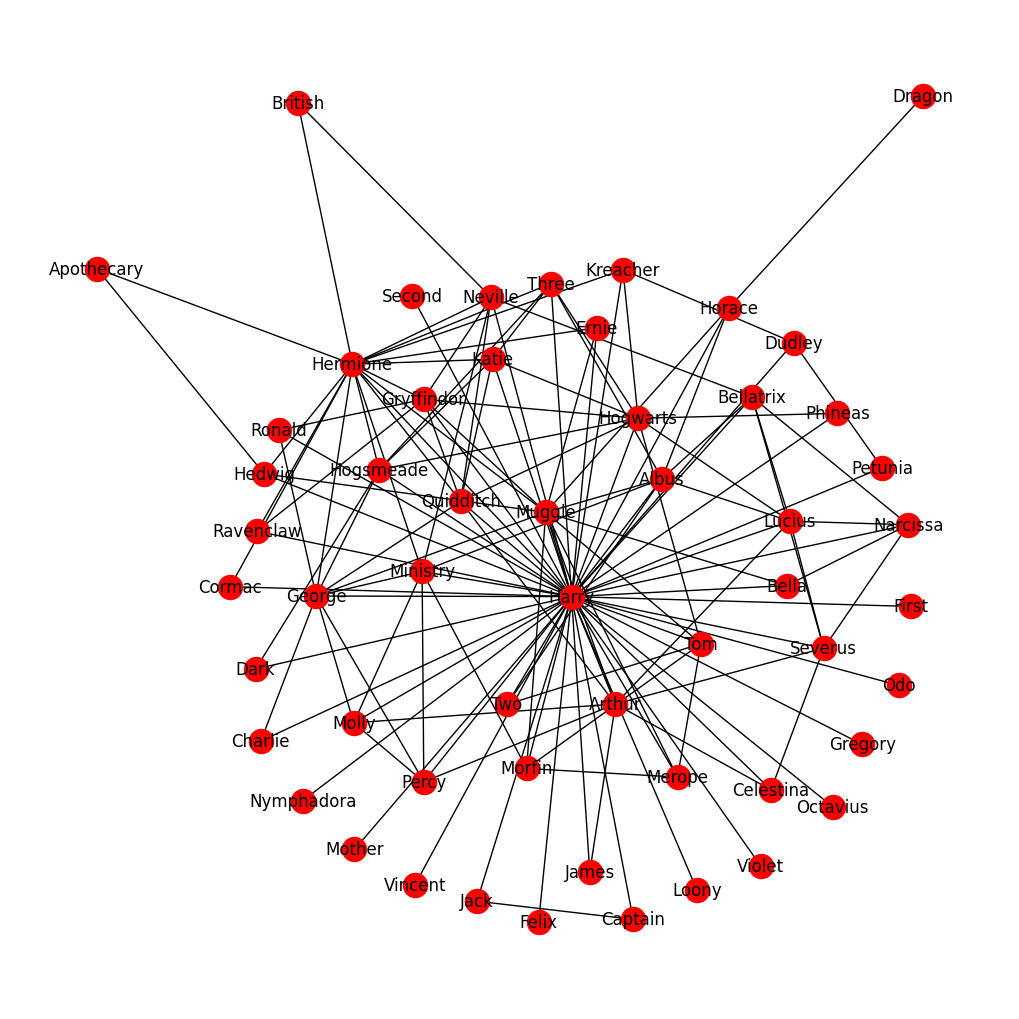

In [29]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw (G, with_labels = True, node_color = "red", edge_cmap = plt.cm.Blues, pos=pos)
plt.show()

As we can see, the graph is not interractive and user friendly, as some of the names can't be seen properly and we can't zoom in or out on the graph.
So, I will integrate it with pyvis to get a more interractive and user friendly graph.

## Graph Visualization with pyvis

In [30]:
from pyvis.network import Network
net  = Network(notebook = True, width = "1000px", height = "700px", bgcolor = "#222222", font_color = "white")

node_degree = dict(G.degree)

# Setting up node_size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("Harrypotter.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [31]:
dict(G.degree)

{'Harry': 51,
 'Muggle': 13,
 'First': 1,
 'Bella': 3,
 'Narcissa': 5,
 'Severus': 6,
 'Bellatrix': 6,
 'Albus': 8,
 'Lucius': 7,
 'Hogwarts': 10,
 'Ministry': 8,
 'Neville': 7,
 'Hedwig': 4,
 'Petunia': 2,
 'Dudley': 3,
 'Kreacher': 4,
 'Hermione': 17,
 'Dark': 2,
 'Horace': 4,
 'Dragon': 1,
 'Two': 3,
 'Second': 1,
 'Gryffindor': 8,
 'Quidditch': 8,
 'Ronald': 3,
 'Arthur': 9,
 'Molly': 5,
 'Nymphadora': 1,
 'George': 10,
 'Percy': 5,
 'Three': 6,
 'Charlie': 2,
 'Tom': 6,
 'Mother': 1,
 'Apothecary': 2,
 'Cormac': 2,
 'James': 2,
 'Vincent': 1,
 'Ravenclaw': 3,
 'Hogsmeade': 7,
 'Jack': 2,
 'Captain': 2,
 'Ernie': 3,
 'Felix': 1,
 'Morfin': 5,
 'Merope': 4,
 'Katie': 6,
 'Phineas': 2,
 'Loony': 1,
 'Celestina': 3,
 'Violet': 1,
 'Octavius': 1,
 'Gregory': 1,
 'Odo': 1,
 'British': 2}

## The most important characters
According to the graph, the most important characters are: Harry Potter, Harmione, and Muggle. Muggles are non-magical individuals in the Harry Potter story. So I suspect that this muggle is Ronald Wisley. To further investigate, I will measure the node centrality. Node centrality is the measured by the number of connections a node has in the graph.

In [32]:
# Degree of centrallity
degree_dict=nx.degree_centrality(G)
degree_dict

{'Harry': 0.9444444444444444,
 'Muggle': 0.24074074074074073,
 'First': 0.018518518518518517,
 'Bella': 0.05555555555555555,
 'Narcissa': 0.09259259259259259,
 'Severus': 0.1111111111111111,
 'Bellatrix': 0.1111111111111111,
 'Albus': 0.14814814814814814,
 'Lucius': 0.12962962962962962,
 'Hogwarts': 0.18518518518518517,
 'Ministry': 0.14814814814814814,
 'Neville': 0.12962962962962962,
 'Hedwig': 0.07407407407407407,
 'Petunia': 0.037037037037037035,
 'Dudley': 0.05555555555555555,
 'Kreacher': 0.07407407407407407,
 'Hermione': 0.31481481481481477,
 'Dark': 0.037037037037037035,
 'Horace': 0.07407407407407407,
 'Dragon': 0.018518518518518517,
 'Two': 0.05555555555555555,
 'Second': 0.018518518518518517,
 'Gryffindor': 0.14814814814814814,
 'Quidditch': 0.14814814814814814,
 'Ronald': 0.05555555555555555,
 'Arthur': 0.16666666666666666,
 'Molly': 0.09259259259259259,
 'Nymphadora': 0.018518518518518517,
 'George': 0.18518518518518517,
 'Percy': 0.09259259259259259,
 'Three': 0.111111111

<Axes: >

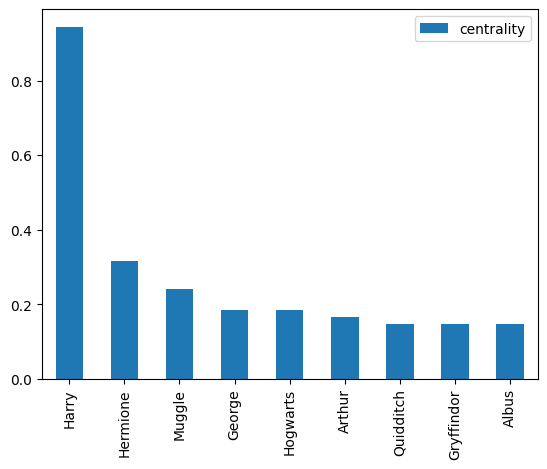

In [33]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient="index" , columns=['centrality'])

#plot top 10
degree_df.sort_values('centrality',ascending=False) [0:9].plot(kind= "bar")

The graph is correct 😊

<Axes: >

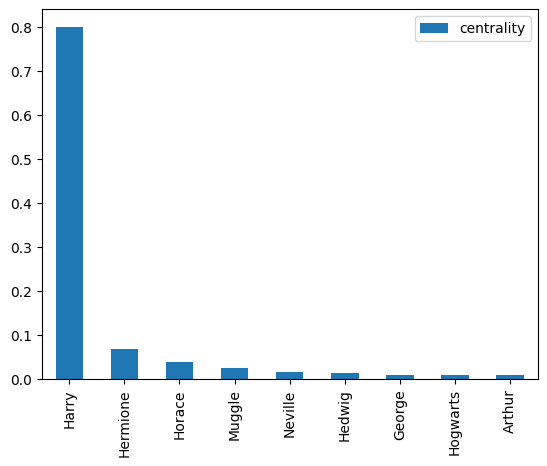

In [34]:
# Betweenness centrality
# This measures how often a node serves as a bridge along the shortest path between the two other nodes.

betweenness_dict=nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient = "index", columns=['centrality'])

#plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False) [0:9].plot(kind="bar")

So the most important character in betweenness centrality

<Axes: >

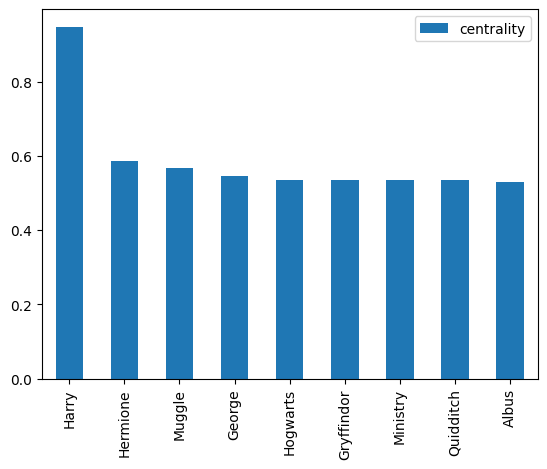

In [35]:
# Closeness centrality
# This is the measure of how close a node interacts with other nodes
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient="index", columns=['centrality'])

#plot top 10
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

The results are similar

In [36]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_cetrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_cetrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_cetrality')

## Community Detection

Community detection is used to evaluate how groups of nodes are clustered or partitioned, as well as their tendency to strengthen or break apart

In [37]:
import community as community_louvain

In [38]:
communities=community_louvain.best_partition(G)

In [39]:
communities

{'Harry': 0,
 'Muggle': 1,
 'First': 0,
 'Bella': 2,
 'Narcissa': 2,
 'Severus': 2,
 'Bellatrix': 2,
 'Albus': 1,
 'Lucius': 2,
 'Hogwarts': 3,
 'Ministry': 4,
 'Neville': 5,
 'Hedwig': 5,
 'Petunia': 0,
 'Dudley': 0,
 'Kreacher': 0,
 'Hermione': 5,
 'Dark': 3,
 'Horace': 1,
 'Dragon': 1,
 'Two': 1,
 'Second': 0,
 'Gryffindor': 5,
 'Quidditch': 5,
 'Ronald': 4,
 'Arthur': 2,
 'Molly': 4,
 'Nymphadora': 0,
 'George': 4,
 'Percy': 4,
 'Three': 3,
 'Charlie': 4,
 'Tom': 1,
 'Mother': 0,
 'Apothecary': 5,
 'Cormac': 5,
 'James': 2,
 'Vincent': 0,
 'Ravenclaw': 5,
 'Hogsmeade': 3,
 'Jack': 0,
 'Captain': 0,
 'Ernie': 1,
 'Felix': 0,
 'Morfin': 1,
 'Merope': 1,
 'Katie': 3,
 'Phineas': 3,
 'Loony': 0,
 'Celestina': 2,
 'Violet': 0,
 'Octavius': 0,
 'Gregory': 0,
 'Odo': 0,
 'British': 5}

In [40]:
nx.set_node_attributes(G, communities, 'group')

In [41]:
com_net = Network(notebook=True, width="1000px", height="700px",  bgcolor= "#222222", font_color="white")
com_net.from_nx(G)
com_net.show("Harrypotter.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## Charecters' importance over time

In [42]:
from lib.functions import *

From the visualization, we can see that the main communities are:
Harry, Hermione, Muggle, George, Hogwarts and Lucius

In [43]:
# Initializing empty list of graphs from books
import os
books_graph=[]
all_books = [b for b in os.scandir('text') if '.txt' in b.name]

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)
all_books

[<DirEntry "Book 1 - The Philosopher's Stone.txt">,
 <DirEntry 'Book 2 - The Chamber of Secrets.txt'>,
 <DirEntry 'Book 3 - The Prisoner of Azkaban.txt'>,
 <DirEntry 'Book 4 - The Goblet of Fire.txt'>,
 <DirEntry 'Book 5 - The Order of the Phoenix.txt'>,
 <DirEntry 'Book 6 - The Half Blood Prince.txt'>,
 <DirEntry 'Book 7 - The Deathly Hallows.txt'>]

In [44]:
# Loop through book list and create graphs
for book in all_books:
    book_text = ner(book)

    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)

    # Select only character entities
    sent_entity_df['character_entities']=sent_entity_df['entities'].apply(lambda x: filter_entity(x, characters_df))

    # #Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len)>0]
    
    #Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
                                                                                                       for item in x])
    windows_size=5
    ralationships = []
    
    for i in range (sent_entity_df_filtered.index[-1]):
        end_i = min(i+5, sent_entity_df_filtered.index[-1])
        char_list = sum((sent_entity_df_filtered.loc[i:end_i].character_entities), [])
    
     #Remove duplicated characters that are next to each other
        char_unique = [char_list[i] for i in range (len(char_list))
                  if (i==0) or char_list[i] != char_list[i-1]] 
    
        if len(char_unique) > 1:
            for idx, a in enumerate(char_unique[:-1]):
                b=char_unique[idx + 1]
                ralationships.append({"source": a, "target":b})
    relationships_df = pd.DataFrame(ralationships)

    # Sort the cases with a ->b and b->a
    relationships_df = pd.DataFrame(np.sort(relationships_df.values, axis = 1), columns=relationships_df.columns)

    relationships_df["value"] = 1
    relationships_df = relationships_df.groupby(["source", "target"], sort = False, as_index=False).sum()
   
    # I create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationships_df,
                               source = "source",
                               target = "target",
                               edge_attr = "value",
                               create_using = nx.Graph())

    books_graph.append(G)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15348\2699611795.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15348\2699611795.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
C:\Users\ADMIN\AppData\Local\T

<Axes: >

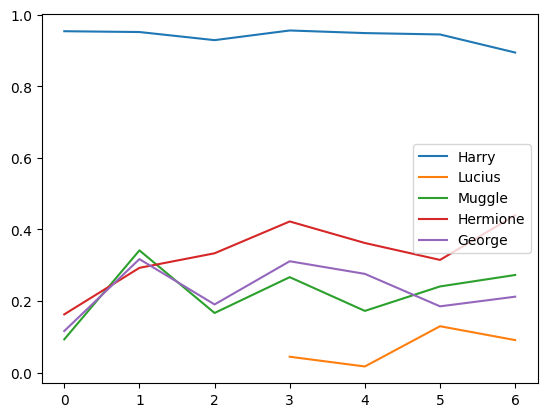

In [45]:
# Creating a list of degree centrality of all the books
evol=[nx.degree_centrality(book) for book in books_graph]

# Creating a DateFrame from the list of degree centralities in all the books
degree_evol_df=pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 4 main characters
degree_evol_df[["Harry", "Lucius", "Muggle", "Hermione", "George" ]].plot()